In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
data = pd.read_csv(r'C:\Users\IT Rajbhawan\Desktop\pythonpro\fake news detection\fake_or_real_news1.csv')

In [3]:
data.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.describe

<bound method NDFrame.describe of          id                                              title  \
0      8476                       You Can Smell Hillary’s Fear   
1     10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2      3608        Kerry to go to Paris in gesture of sympathy   
3     10142  Bernie supporters on Twitter erupt in anger ag...   
4       875   The Battle of New York: Why This Primary Matters   
...     ...                                                ...   
6330   4490  State Department says it can't find emails fro...   
6331   8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332   8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333   4021  In Ethiopia, Obama seeks progress on peace, se...   
6334   4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit S

In [5]:
# Making a new cloumn using a lambda function to represent fake and real news in form of 1 and 0
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)

In [6]:
data

,id,title,text,label,fake
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0


In [7]:
# Dropping the previous target column label
data = data.drop('label',axis=1)

In [8]:
data

,id,title,text,fake
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


In [9]:
# Counting the number of missing values in the dataset
data.isnull().sum()

id       0
title    0
text     0
fake     0
dtype: int64

<AxesSubplot: xlabel='fake', ylabel='count'>

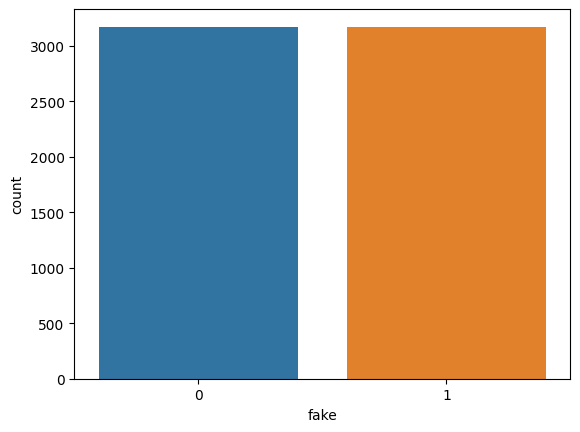

In [10]:
# Countplot showing the number of unique values in the fake category
sns.countplot(data=data,
              x='fake',
              order=data['fake'].value_counts().index)

In [11]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to C:\Users\IT
[nltk_data]     Rajbhawan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\IT
[nltk_data]     Rajbhawan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [13]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████████| 6335/6335 [13:31<00:00,  7.81it/s]


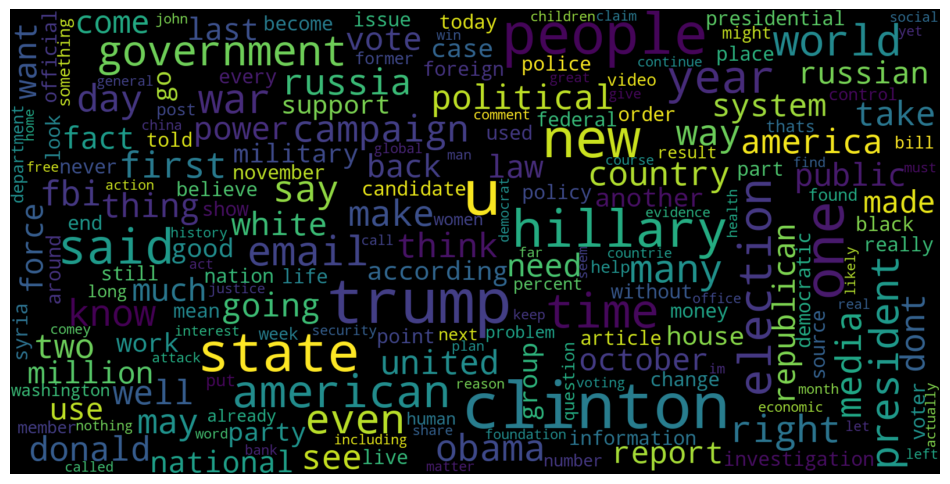

In [14]:
# Words used in fake news
consolidated = ' '.join(
    word for word in data['text'][data['fake'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(12, 8))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

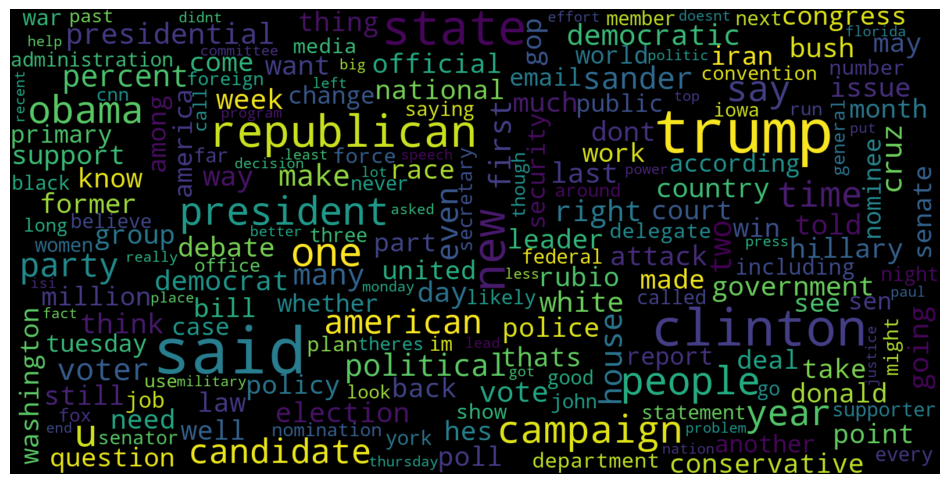

In [15]:
# Words used in real news
consolidated = ' '.join(
    word for word in data['text'][data['fake'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(12, 8))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# Making input and target features
x,y = data['text'] , data['fake']

In [17]:
y

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: fake, Length: 6335, dtype: int64

In [18]:
x

0       daniel greenfield shillman journalism fellow f...
1       google pinterest digg linkedin reddit stumbleu...
2       us secretary state john f kerry said monday st...
3       kaydee king kaydeeking november 9 2016 the les...
4       its primary day new york frontrunners hillary ...
                              ...                        
6330    the state department told republican national ...
6331    the p pbs should stand plutocratic pentagon po...
6332    antitrump protesters are tools oligarchy refor...
6333    addis ababa ethiopia president obama convened ...
6334    jeb bush is suddenly attacking trump heres why...
Name: text, Length: 6335, dtype: object

In [19]:
# Splitting dataset into training and testing dataframes
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [20]:
# Number of train samples ( equal to Y_train )
X_train.size

5068

In [21]:
# Number of test samples ( equal to Y_test )
X_test.size

1267

In [22]:
# Vectorizing the data ( converting into numerical form )
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [23]:
X_test_vectorized

<1267x78688 sparse matrix of type '<class 'numpy.float64'>'
	with 327776 stored elements in Compressed Sparse Row format>

In [24]:
# Fitting the model with vectorized training data
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_vectorized, Y_train)

LinearSVC()

In [25]:
logistic = LogisticRegression()
logistic.fit(X_train_vectorized, Y_train)

LogisticRegression()

In [26]:
logistic.score(X_test_vectorized, Y_test)

0.9218626677190213

In [27]:
SVclassifier.score(X_test_vectorized,Y_test)

0.9447513812154696

In [28]:
Y_test_predicted=SVclassifier.predict(X_test_vectorized)
Y_test_predicted

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
Y_test.shape

(1267,)

In [30]:
# Number of news articles classified correctly out of 1267
print("By logistic regression: ",(Y_test.size) * 0.9266)
print("By SVC:", (Y_test.size) * 0.9408)

By logistic regression:  1174.0022
By SVC: 1191.9936


In [36]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, Y_test_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       624
           1       0.93      0.96      0.95       643

    accuracy                           0.94      1267
   macro avg       0.95      0.94      0.94      1267
weighted avg       0.95      0.94      0.94      1267



In [51]:
check_news = X_test_vectorized[0]
result = SVclassifier.predict(check_news)

print(result)
if(result[0]==0):
    print("REAL NEWS")
else:
    print("FAKE NEWS")

[1]
FAKE NEWS
